In [1]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

Using TensorFlow backend.


In [2]:
batch_size = 128
n_classes = 10
n_epochs = 10

im_row, im_col = 28, 28

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

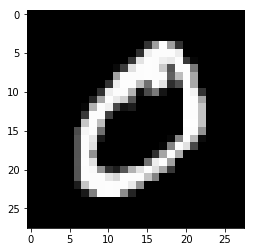

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[1], cmap="gray")
plt.show()

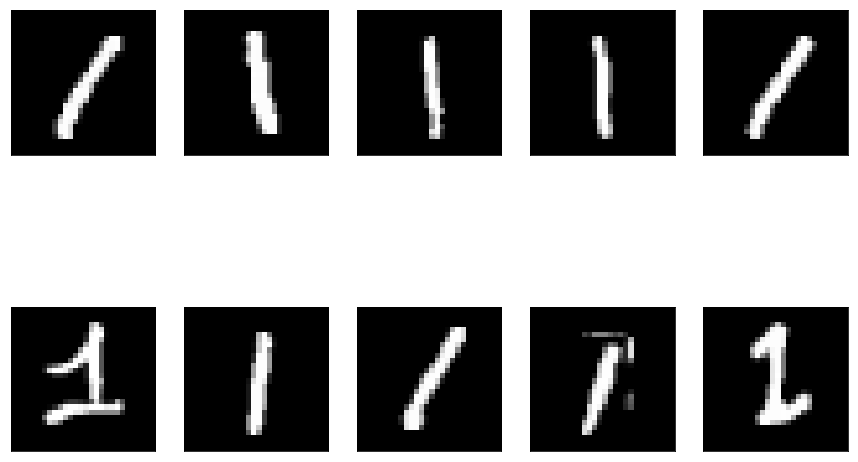

In [5]:
fig = plt.figure(figsize=(15,10))

i=0
for f in range(0, y_train.shape[0]):
    if (y_train[f] == 1 and i < 10):
        plt.subplot(2,5, i+1)
        plt.imshow(x_train[f], cmap="gray")
        plt.xticks([])
        plt.yticks([])
        i=i+1

plt.show()

In [6]:
print("x_train: {}\nx_test: {}\n".format(x_train.shape, x_test.shape, ))

x_train: (60000, 28, 28)
x_test: (10000, 28, 28)



In [7]:
if K.image_data_format() == "channels_first":
    x_train = x_train.reshape(x_train.shape[0], 1, im_row, im_col)
    x_test = x_test.reshape(x_test.shape[0], 1, im_row, im_col)
    input_shape = (1, im_row, im_col)
else:
    x_train = x_train.reshape(x_train.shape[0], im_row, im_col, 1)
    x_test = x_test.reshape(x_test.shape[0], im_row, im_col, 1)
    input_shape = (im_row, im_col, 1)

In [8]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [9]:
print("x_train: {}\nx_test: {}\ninput_shape: {}\n# of training samples: {}\n# of test samples: {}".format(
x_train.shape, x_test.shape, input_shape, x_train.shape[0], x_test.shape[0]))

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)
input_shape: (28, 28, 1)
# of training samples: 60000
# of test samples: 10000


In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [11]:
from keras.callbacks.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath="keras_MNIST_CNN.h5", verbose=0, save_best_only=True)

model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=n_epochs,
         verbose=1,
         validation_data=(x_test, y_test),
         callbacks=[checkpoint])

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.2574 - accuracy: 0.9209 - val_loss: 0.0555 - val_accuracy: 0.9829
Epoch 2/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0939 - accuracy: 0.9724 - val_loss: 0.0414 - val_accuracy: 0.9867
Epoch 3/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0694 - accuracy: 0.9783 - val_loss: 0.0361 - val_accuracy: 0.9882
Epoch 4/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0566 - accuracy: 0.9832 - val_loss: 0.0345 - val_accuracy: 0.9894
Epoch 5/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0482 - accuracy: 0.9848 - val_loss: 0.0280 - val_accuracy: 0.9912
Epoch 6/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0264 - val_accuracy: 0.9917
Epoch 7/10
60000/60000 [==============================] - 105s 2m

In [13]:
from sklearn.metrics import roc_auc_score

preds = model.predict(x_test)
auc = roc_auc_score(np.round(preds), y_test)
print("AUC: {:.2%}".format(auc))

AUC: 99.56%


c:\users\polko\docume~1\anomal~1\venv35\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  after removing the cwd from sys.path.


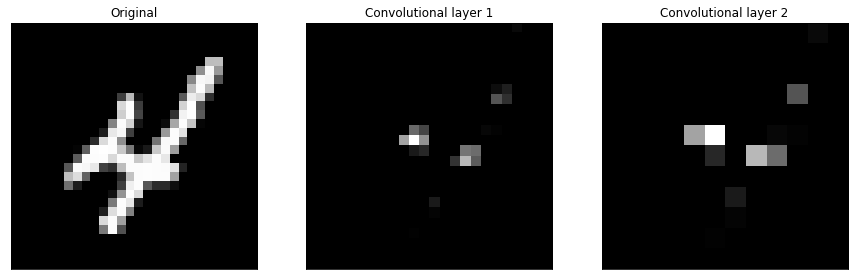

In [17]:
from keras import models

layers = [layer.output for layer in model.layers[:4]]
model_layers = models.Model(inputs=model.input, output=layers)
activations = model_layers.predict(x_train)

fig = plt.figure(figsize=(15, 10))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(x_train[9].reshape(28, 28), cmap="gray")
plt.xticks([])
plt.yticks([])

for f in range(1,3):
    plt.subplot(1,3, f+1)
    plt.title("Convolutional layer %d" %f)
    layer_activation = activations[f]
    plt.imshow(layer_activation[9, :, :, 0], cmap="gray")
    plt.xticks([])
    plt.yticks([])

plt.show()